# **seaborn**

Seaborn is a Python library built on top of Matplotlib that makes statistical data visualization easier and more beautiful.

In [ ]:
pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("ocn_data.csv")

# Optional: Set style
#sns.set() sets the default aesthetics for plots using Seaborn
sns.set(style="whitegrid") #adds a white background with grid lines

**Distribution Plot of pH**

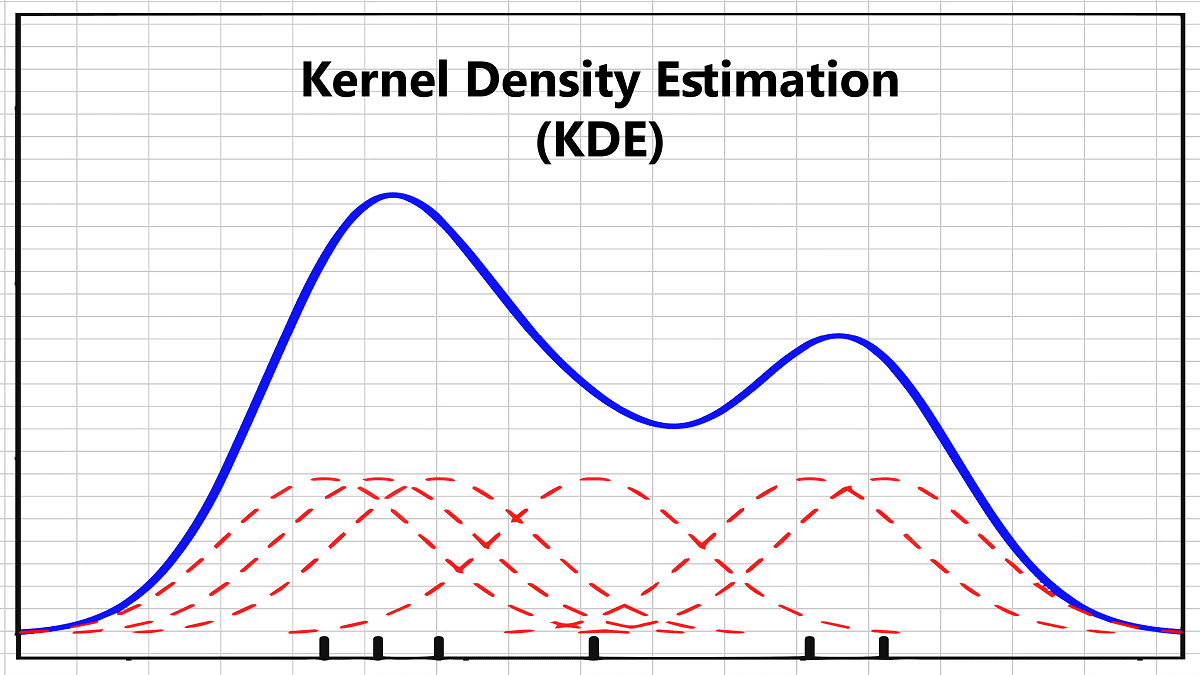

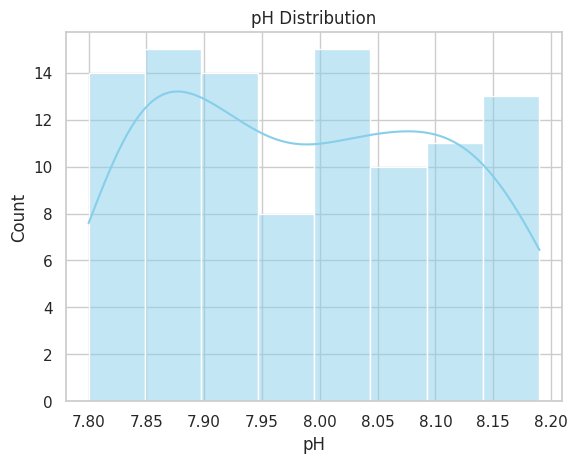

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram of the 'pH' column with a Kernel Density Estimate (KDE) line
sns.histplot(df['pH'], kde=True, color='skyblue')  # Histogram + smooth KDE curve, skyblue color

# Set the title of the plot
plt.title("pH Distribution")  # Adds a title above the plot

# Display the plot
plt.show()  # Renders the plot window

**Lineplot of Temperature**

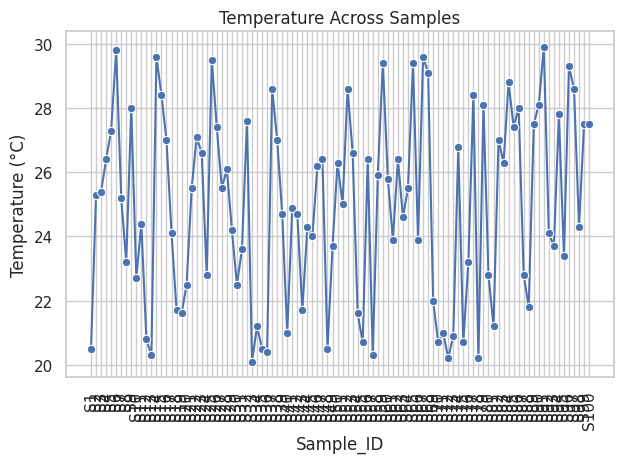

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot temperature across samples using a line plot with circle markers
sns.lineplot(x='Sample_ID', y='Temperature (°C)', data=df, marker='o')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add a title to the plot
plt.title("Temperature Across Samples")

# Adjust layout to prevent label overlap
plt.tight_layout()  # to prevent label overlap

# Show the plot
plt.show()

**Scatterplot: Temperature vs Dissolved Oxygen**

hue='Salinity (PSU)':

This tells Seaborn to color the scatter points based on the values of the 'Salinity (PSU)' column. So each point's color reflects how salty the water was at that sample.

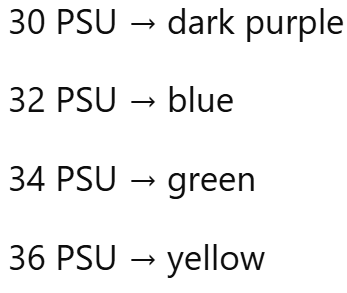

palette='viridis':

This specifies the color scale (or palette) used.
viridis is a continuous color palette, moving from dark purple → blue → green → yellow, and is colorblind-friendly and perceptually uniform.

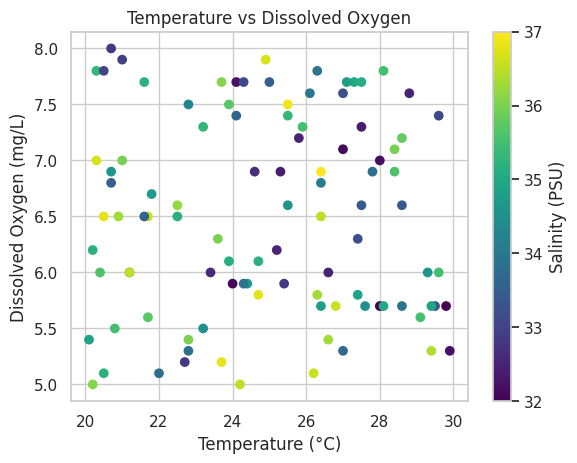

In [ ]:
import matplotlib.pyplot as plt

# Plot with continuous color mapping
sc = plt.scatter(df['Temperature (°C)'], df['Dissolved_Oxygen (mg/L)'],
                 c=df['Salinity (PSU)'], cmap='viridis')
plt.colorbar(sc, label='Salinity (PSU)')  # Add colorbar for reference
plt.title("Temperature vs Dissolved Oxygen")
plt.xlabel("Temperature (°C)")
plt.ylabel("Dissolved Oxygen (mg/L)")
plt.show()

**Heatmap of Correlation Matrix**

A correlation heatmap is a graphical tool that displays the correlation between multiple variables as a color-coded matrix. It's like a color chart that shows us how closely related different variables are.

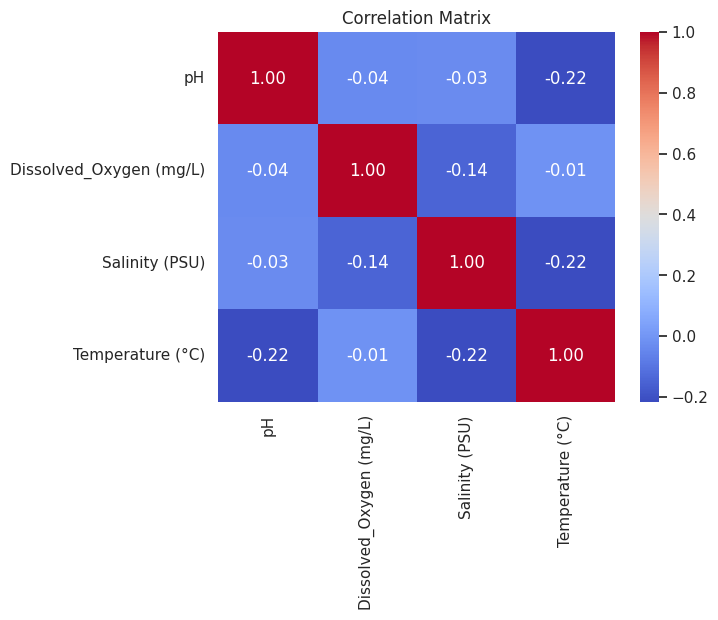

In [ ]:
# Compute the correlation matrix between selected columns
corr = df[['pH', 'Dissolved_Oxygen (mg/L)', 'Salinity (PSU)', 'Temperature (°C)']].corr()

# Create a heatmap of the correlation matrix with annotations and color scale
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")  # annot=True shows correlation values; cmap sets color; fmt=".2f" formats numbers to 2 decimal places

# Add a title to the heatmap
plt.title("Correlation Matrix")

# Display the heatmap
plt.show()

# **scipy**

scientific and numerical computing modules

In [ ]:
pip install scipy

**Pearson Correlation (Temperature vs DO)**

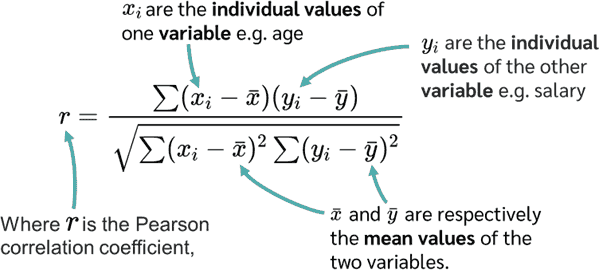

What is print(f"...")?

This is a Python f-string, short for formatted string literal. It allows you to embed variables and expressions directly inside a string by using {}.

In [ ]:
# Import the pearsonr function from scipy.stats
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and p-value between temperature and dissolved oxygen
corr, p_value = pearsonr(df['Temperature (°C)'], df['Dissolved_Oxygen (mg/L)'])

# Print the correlation value (2 decimal places) and p-value (4 decimal places)
print(f"Pearson Correlation: {corr:.2f}, P-value: {p_value:.4f}")

Pearson Correlation: -0.01, P-value: 0.9032


This value is very close to 0, indicating no linear relationship between temperature and dissolved oxygen.

In practical terms: as temperature increases or decreases, dissolved oxygen levels do not change in a consistent, linear way.

The P value is much greater than 0.05, which means the result is not statistically significant.

We fail to reject the null hypothesis, which states that there is no correlation.

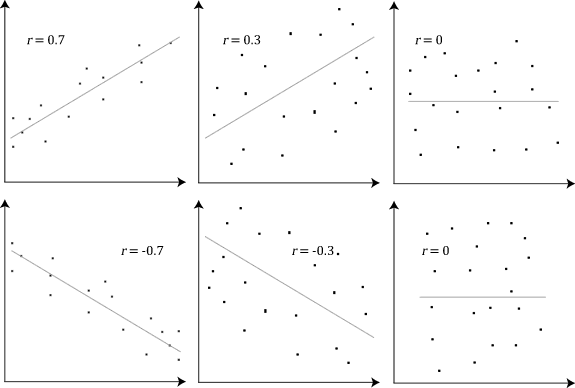

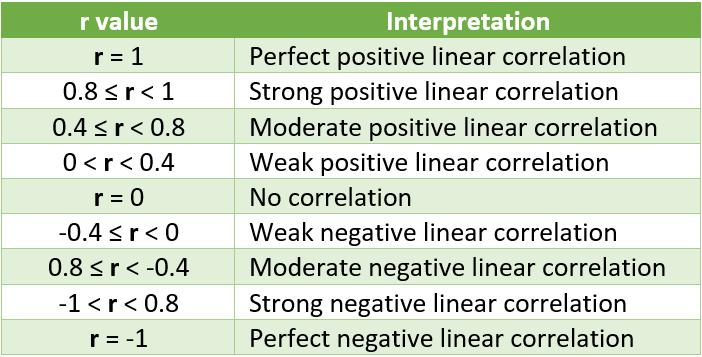

**T-test (Compare pH to mean of 8.0)**

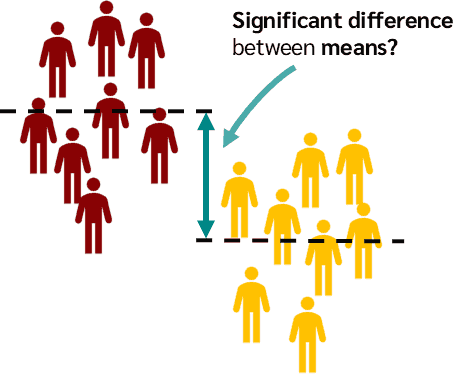

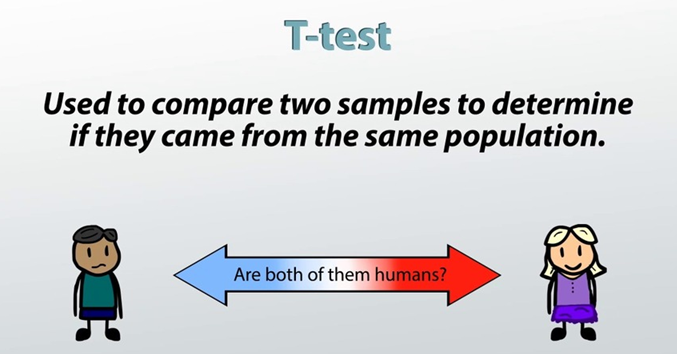

In [ ]:
# Import the one-sample t-test function
from scipy.stats import ttest_1samp

# Perform a one-sample t-test to check if the mean pH is significantly different from 8.0
t_stat, p_val = ttest_1samp(df['pH'], 8.0)

# Print the t-statistic (2 decimal places) and p-value (4 decimal places)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")

T-statistic: -1.00, P-value: 0.3198


T-statistic = -1.00

This tells us that the average pH is a little less than 8.0, but not by much.

P-value = 0.3198

This number tells us if the difference is statistically important.
We usually look for p < 0.05 to say it’s significant.

→ Since 0.3198 > 0.05, we say:

❌ "The difference is not significant — it could just be random."

**Linear Regression (Temperature vs Salinity)**

In [ ]:
# Import the linear regression function from scipy.stats
from scipy.stats import linregress

# Perform linear regression between Temperature and Salinity
# It returns slope, intercept, correlation coefficient (r_value), p-value, and standard error
slope, intercept, r_value, p_value, std_err = linregress(df['Temperature (°C)'], df['Salinity (PSU)'])

# Print the slope, intercept, and R-squared value (r_value squared)
# Slope: how much salinity changes for each degree change in temperature
# Intercept: estimated salinity when temperature is 0
# R²: how well temperature explains the variation in salinity (0 = no fit, 1 = perfect fit)
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}, R²: {r_value**2:.2f}")

Slope: -0.11, Intercept: 37.28, R²: 0.05


Slope = -0.11

This means that for every 1°C increase in temperature, the salinity decreases by 0.11 PSU (Practical Salinity Units).

The relationship is negative, but very weak.

Intercept = 37.28

This is the estimated salinity when the temperature is 0°C.

It’s the starting point of the line on the y-axis in the regression equation.

R² = 0.05

The R-squared value is only 0.05, or 5%.

This means that only 5% of the variation in salinity can be explained by temperature.

The remaining 95% is due to other factors or random variation.

**Multiple Linear Regression**

We can perform Multiple Linear Regression using the dataset we provided, where we predict Dissolved Oxygen (mg/L) based on pH, Salinity (PSU), and Temperature (°C).

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('ocn_data.csv')

# Define features and target
X = df[['pH', 'Salinity (PSU)', 'Temperature (°C)']]  # inputs
y = df['Dissolved_Oxygen (mg/L)']                    # output

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the result
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 13.432937841980415
Coefficients: [-0.40081839 -0.09540553 -0.01750284]


Dissolved Oxygen (mg/L)=13.43−0.40×pH−0.095×Salinity (PSU)−0.018×Temperature (°C)